In [88]:
import os
from skimage.io import imread
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, BatchNormalization, MaxPooling2D, Activation
from keras.utils import np_utils
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import random
from PIL import Image
from keras import Input, Model


In [2]:
male_dir = os.path.join('data', '128', 'male')
female_dir = os.path.join('data', '128', 'female')


In [3]:
def display_image(image):
    fig = plt.figure
    plt.imshow(image, cmap='gray')


In [89]:
def read_image(path):
    img = Image.open(path).convert('L')
    return np.asarray(img)


In [5]:
def get_all_files(path):
    onlyfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    return onlyfiles

In [6]:
def get_all_folders(path):
    folders = [f for f in os.listdir(
        path) if os.path.isdir(os.path.join(path, f))]
    return folders


In [7]:
class Person:
    def __init__(self, image_data, age_id, sex):
        self.image_data = image_data
        self.age_id = age_id
        self.sex = sex
    

In [146]:
male_persons = list()
male_folders = get_all_folders(male_dir)
male_folders = sorted(male_folders)
for x in range(0, len(male_folders)):
    male_folder = male_folders[x]
    image_paths = get_all_files(os.path.join(male_dir, male_folder))
    for image_path in image_paths:
        image = read_image(os.path.join(male_dir, male_folder, image_path))
        male_persons.append(Person(image, x, 0))


In [9]:
len(male_persons)

18819

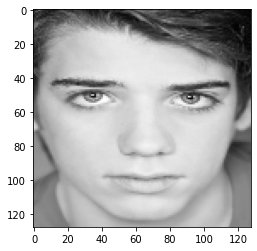

In [91]:
display_image(male_persons[0].image_data)

In [147]:
female_persons = list()
female_folders = get_all_folders(female_dir)
female_folders = sorted(female_folders)
for x in range(0, len(female_folders)):
    female_folder = female_folders[x]
    image_paths = get_all_files(os.path.join(female_dir, female_folder))
    for image_path in image_paths:
        image = read_image(os.path.join(female_dir, female_folder, image_path))
        female_persons.append(Person(image, x , 1))


In [12]:
len(female_persons)


17480

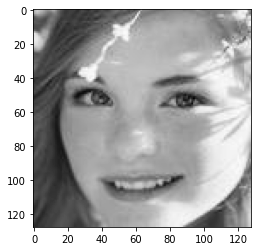

In [93]:
display_image(female_persons[2].image_data)


In [28]:
for female in female_persons:
    female.sex = 1

In [148]:
persons = list()

for male_person in male_persons:
    persons.append(male_person)
    
for female_person in female_persons:
    persons.append(female_person)
# y =0
# for x in range(len(male_persons)):
#     persons[y] = male_persons[x]
#     y = x
    
# for x in range(len(female_persons)):
#     persons[y] = female_persons[x]
#     y +=1


In [150]:
random.shuffle(persons)


In [97]:
def encode(num, cat_len):
    code = [0]*cat_len
    code[num - 1] = 1
    return code

In [151]:
images = [None]* len(persons)
age_group = [None]*len(persons)
sexs = [None]*len(persons)
for x in range(len(persons)):
    images[x] = persons[x].image_data
    age_group[x] = np_utils.to_categorical(persons[x].age_id, 11)
    sexs[x] = persons[x].sex


In [152]:
age_group[:50]

[array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.

In [153]:
def train_test_split(train_percentage, images, age_grps, sexs):
    data_len = len(images)
    train_val = int(data_len * (train_percentage / 100))
    train_images = [None]*train_val
    train_age_grp = [None]*train_val
    train_sexs = [None]*train_val
    test_images = [None] * (data_len - train_val)
    test_age_grps = [None] * (data_len - train_val)
    test_sexs = [None] * (data_len - train_val)
    i = 0
    for x in range(data_len):
        if x < train_val:
            train_images[x] = images[x]
            train_age_grp[x] = age_grps[x]
            train_sexs[x] = sexs[x]
        else:
            test_images[i] = images[x]
            test_age_grps[i] = age_grps[x]
            test_sexs[i] = sexs[x]
            i += 1
    return (np.array(train_images), np.array(train_age_grp), np.array(train_sexs)), (np.array(test_images), np.array(test_age_grps), np.array(test_sexs))


In [154]:
(x_train, y_train_age_grp, y_train_sexs), (x_test, y_test_age_grp, y_test_sexs) = train_test_split(90, images, age_group, sexs)


In [101]:
print(x_train[0].shape)

(128, 128)


In [155]:
x_train = x_train /255
x_test = x_test /255

In [85]:

# building a linear stack of layers with the sequential input
input = Input(shape=(128, 128, 3))
input = Conv2D(256, kernel_size=(3, 3), strides=2, activation='relu')(input)
input = Conv2D(256, kernel_size=(3, 3), strides=2, activation='relu')(input)
input = BatchNormalization()(input)
input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
input = BatchNormalization()(input)
input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
# input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
# input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(input)
# input = BatchNormalization()(input)
input = Flatten()(input)
input = Dense(128, activation='relu')(input)
input = Dense(100, activation='relu')(input)
input = Dense(64, activation='relu')(input)
# # convolutional layer
# input.add(Conv2D(256, input_shape=(96, 96, 1),
#                  kernel_size=(3, 3), strides=2, activation='relu'))
# input.add(Conv2D(256, kernel_size=(3, 3), strides=2, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# convolutional layer
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(BatchNormalization())
# # convolutional layer
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
# input.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='sigmoid'))
# # flatten output of conv
# flatten output of conv
# input.add(Flatten())
# # hidden layer
# input.add(Dense(100, activation='relu'))
# # hidden layer
# input.add(Dense(60, activation='relu'))
# # output layer
# input.add(Dense(30, activation="sigmoid"))
age_grp_output = Dense(11, activation='softmax')(input)
sex_output = Dense(1, activation='sigmoid')(input)
model = Model(inputs=input, outputs=[age_grp_output, sex_output])
# compiling the sequential input
model.compile(
    loss=['categorical_crossentropy', 'mse'], optimizer='adam')
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 64)]         0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 11)           715         ['input_16[0][0]']               
                                                                                                  
 dense_20 (Dense)               (None, 1)            65          ['input_16[0][0]']               
                                                                                                  
Total params: 780
Trainable params: 780
Non-trainable params: 0
__________________________________________________________________________________________________


In [86]:
history = model.fit(x_train, [y_train_age_grp.reshape(1, 11), y_train_sexs], epochs=500, batch_size=100, validation_data=(x_test, y_test_age_grp, y_test_sexs))


Epoch 1/500


ValueError: in user code:

    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 64), found shape=(None, 128, 128, 3)


In [186]:
class UtkMultiOutputModel():
    """
    Used to generate our multi-output model. This CNN contains three branches, one for age, other for 
    sex and another for race. Each branch contains a sequence of Convolutional Layers that is defined
    on the make_default_hidden_layers method.
    """

    def make_default_hidden_layers(self, inputs):
        """
        Used to generate a default set of hidden layers. The structure used in this network is defined as:
        
        Conv2D -> BatchNormalization -> Pooling -> Dropout
        """
        x = Conv2D(16, (3, 3), padding="same")(inputs)
        x = Activation("relu")(x)
        # x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(3, 3))(x)
        # x = Dropout(0.25)(x)
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        # x = Dropout(0.25)(x)
        x = Conv2D(64, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        # x = MaxPooling2D(pool_size=(2, 2))(x)
        # x = Dropout(0.25)(x)
        return x

    def build_gender_branch(self, inputs):
        """
        Used to build the gender branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        # x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)
        x = self.make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="gender_output")(x)
        return x

    def build_age_branch(self, inputs):
        """
        Used to build the age branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = self.make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(11)(x)
        x = Activation("softmax", name="age_output")(x)
        return x

    def assemble_full_model(self, width, height):
        """
        Used to assemble our multi-output model CNN.
        """
        input_shape = (height, width, 1)
        inputs = Input(shape=input_shape)
        age_branch = self.build_age_branch(inputs)
        # race_branch = self.build_race_branch(inputs, num_races)
        gender_branch = self.build_gender_branch(inputs)
        model = Model(inputs=inputs,
                      outputs=[age_branch, gender_branch],
                      name="face_net")
        return model



In [128]:
# y_train_sexs = tf.one_hot(y_train_sexs, depth=2)
y_train_sexs

array([0, 0, 0, ..., 1, 0, 1])

In [135]:
y_train_age_grp.shape


(32669, 11)

In [187]:
model = UtkMultiOutputModel().assemble_full_model(128, 128)
# init_lr = 1e-4
# epochs = 500
# opt = tf.keras.optimizers.Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(optimizer='adam',
              loss={
                  'age_output': 'categorical_crossentropy',
                  'gender_output': 'binary_crossentropy'},
              metrics={
                  'age_output': 'accuracy',
                  'gender_output': 'accuracy'})
model.summary()


Model: "face_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_129 (Conv2D)            (None, 128, 128, 16  160         ['input_26[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_132 (Conv2D)            (None, 128, 128, 16  160         ['input_26[0][0]']               
                                )                                                          

In [188]:
# from keras.callbacks import ModelCheckpoint
# batch_size = 32
# valid_batch_size = 32
# train_gen = data_generator.generate_images(
#     train_idx, is_training=True, batch_size=batch_size)
# valid_gen = data_generator.generate_images(
#     valid_idx, is_training=True, batch_size=valid_batch_size)
# callbacks = [
#     ModelCheckpoint("./model_checkpoint", monitor='val_loss')
# ]
history = model.fit(x_train, [y_train_age_grp, y_train_sexs], epochs=100,
                    batch_size=100, validation_data=(x_test, [y_test_age_grp, y_test_sexs]))
# .fit_generator(train_gen,
                            #   steps_per_epoch=len(train_idx)//batch_size,
                            #   epochs=epochs,
                            #   callbacks=callbacks,
                            #   validation_data=valid_gen,
                            #   validation_steps=len(valid_idx)//valid_batch_size)


Epoch 1/100
327/327 [==============================] - 206s 626ms/step - loss: 2.4994 - age_output_loss: 2.3406 - gender_output_loss: 0.1587 - age_output_accuracy: 0.2286 - gender_output_accuracy: 0.9407 - val_loss: 4.6442 - val_age_output_loss: 3.7595 - val_gender_output_loss: 0.8847 - val_age_output_accuracy: 0.0639 - val_gender_output_accuracy: 0.5116
Epoch 2/100
327/327 [==============================] - 212s 649ms/step - loss: 1.8469 - age_output_loss: 1.7741 - gender_output_loss: 0.0728 - age_output_accuracy: 0.3143 - gender_output_accuracy: 0.9728 - val_loss: 33.3712 - val_age_output_loss: 33.2236 - val_gender_output_loss: 0.1476 - val_age_output_accuracy: 0.0656 - val_gender_output_accuracy: 0.9408
Epoch 3/100
327/327 [==============================] - 224s 686ms/step - loss: 1.7131 - age_output_loss: 1.6813 - gender_output_loss: 0.0318 - age_output_accuracy: 0.3364 - gender_output_accuracy: 0.9893 - val_loss: 2.1345 - val_age_output_loss: 2.0207 - val_gender_output_loss: 0.113

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


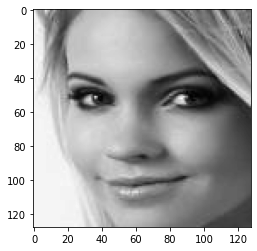

In [289]:
index = 1015
display_image(x_test[index])
print(y_test_age_grp[index])
print(y_test_sexs[index])


In [292]:
output = model.predict(np.array([x_train[index]]), verbose=0)
output

[array([[1.5389264e-15, 3.5355267e-12, 4.0008402e-08, 5.3525702e-07,
         9.9999762e-01, 1.3447367e-06, 4.4239528e-07, 2.2576092e-10,
         1.5074827e-09, 1.7592962e-12, 1.4072155e-12]], dtype=float32),
 array([[1.197306e-05]], dtype=float32)]

In [293]:
print(np.argmax(output[0]))
print(np.around(output[1]))


4
[[0.]]
